In [1]:
pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import IPython
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import preprocessor as p
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
## Read data dari github
data = pd.read_csv('https://raw.githubusercontent.com/novra/dts_sosmed8/main/tweets.csv')
data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


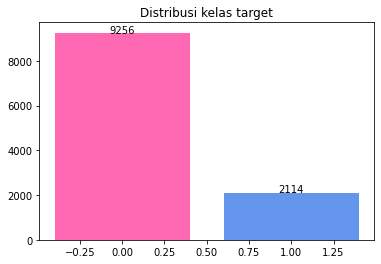

In [4]:
# Menghitung jumlah masing-masing target
target = list(set(data['target']))
jumlah_target = []
for i in target:
  jumlah_target.append(list(data['target']).count(i))

#visualisasi jumlah keyword
warna = np.array(['hotpink', 'cornflowerblue'])
plt.bar(target, jumlah_target, color=warna)
plt.title("Distribusi kelas target")
## Menampilkan label pada grafik
for i in range(len(target)):
    plt.text(i, jumlah_target[i], jumlah_target[i], ha = 'center')

plt.show()

In [5]:
#preprocessing
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

data['text'] = data.apply(preprocess_tweet, axis=1)

In [6]:
def preprocess_data(data):
  #menghapus angka
  data = data.astype(str).str.replace('\d+', '', regex=True)
  #menjadikan lowercase
  lower_text = data.str.lower()
  #lemmatize
  lemmatizer = nltk.stem.WordNetLemmatizer()
  #tokenize
  w_tokenizer =  TweetTokenizer()

  def lemmatize_text(text):
      return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]
  def remove_punctuation(words):
      new_words = []
      for word in words:
          new_word = re.sub(r'[^\w\s]', '', (word))
          if new_word != '':
            new_words.append(new_word)
      return new_words

  words = lower_text.apply(lemmatize_text)
  words = words.apply(remove_punctuation)
  return pd.DataFrame(words)

data['text'] = preprocess_data(data['text'])

In [7]:
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [item for item in x if item not in stop_words])

In [8]:
#join tokenize data
data['text'] = data['text'].apply(lambda x: ' '.join(x))
data

,id,keyword,location,text,target
0,0,ablaze,NaN,communal violence bhainsa telangana stone pelt...,1
1,1,ablaze,NaN,telangana section ha imposed bhainsa january c...,1
2,2,ablaze,New York City,arsonist set car ablaze dealership,1
3,3,ablaze,"Morgantown, WV",arsonist set car ablaze dealership,1
4,4,ablaze,NaN,lord jesus love brings freedom pardon fill hol...,0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,medium warned u well advance wrecked whole nig...,0
11366,11366,wrecked,arohaonces,feel directly attacked consider moonbin jinjin...,0
11367,11367,wrecked,🇵🇭,feel directly attacked consider moonbin jinjin...,0
11368,11368,wrecked,auroraborealis,ok remember outcast nd dora au au wrecked nerv...,0


In [9]:
teks = np.array(data['text'])

#One hot encoding pada data target
target = np.array(pd.get_dummies(data['target']))

# Pemisahan data training & data testing
data_train,data_test,label_train,label_test = train_test_split(teks, target, test_size=0.2,
                                                               stratify=target, random_state=7)

In [10]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.8 MB/s 
     |████████████████████████████████| 6.6 MB 33.1 MB/s 
     |████████████████████████████████| 596 kB 51.8 MB/s 
     |████████████████████████████████| 101 kB 6.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [11]:
from transformers import BertTokenizer, TFBertModel
bert_tokenizer = BertTokenizer.from_pretrained('cross-encoder/ms-marco-TinyBERT-L-2-v2')
bert_model = TFBertModel.from_pretrained("cross-encoder/ms-marco-TinyBERT-L-2-v2", trainable=False, from_pt=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/787 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/16.8M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['classifier.bias', 'bert.embeddings.position_ids', 'classifier.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [12]:
# Pendefinisian fungsi untuk melakukan tokenisasi pada satu data
def tokenisasi(teks):
      encode_dict = bert_tokenizer(teks,
                                   add_special_tokens = True,
                                   max_length = 80,
                                   padding = 'max_length',
                                   truncation = True,
                                   return_attention_mask = True,
                                   return_tensors = 'tf',)

      tokenID = encode_dict['input_ids']
      attention_mask = encode_dict['attention_mask']

      return tokenID, attention_mask

# Pendefinisian fungsi untuk mengambil hasil tokenisasi pada semua data
def create_input(data):
    tokenID, input_mask = [], []
    for teks in data:
        token, mask = tokenisasi(teks)
        tokenID.append(token)
        input_mask.append(mask)
    
    return {'input_ids': np.asarray(tokenID, dtype=np.int32).reshape(-1, 80), 
            'attention_mask': np.asarray(input_mask, dtype=np.int32).reshape(-1, 80)}

In [13]:
# Membuat tokenID untuk X_train dan X_test
X_train = create_input(data_train)
X_test = create_input(data_test)

#Mengambil representasi teks dari encoder layer ke 12 BERT
X_train = bert_model(**X_train)[0]
X_test = bert_model(**X_test)[0]

In [14]:
pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 5.0 MB/s 


In [15]:
from keras_tuner.tuners import BayesianOptimization

In [16]:
 #Mendefinisikan fungsi untuk klasifikasi dengan model hybrid CNN-BiLSTM menggunakan beberapa kandidat hyperparameter
def cnn_bilstm(hp):
    #Input layer
    input = keras.layers.Input(shape=(80, 128))

    #Convolution layer
    cnn = keras.layers.Conv1D(filters = hp.Int('filters',
                                                min_value = 200, 
                                                max_value = 300, 
                                                step = 50),
                                  kernel_size = hp.Int('kernel_size',
                                                min_value = 3, 
                                                max_value = 5, 
                                                step = 1),
                                  activation='relu',
                                  kernel_regularizer = keras.regularizers.l2(hp.Choice('kernel_cnn',
                                                                                       values = [0.01, 0.001])))(input)

    #Max Pooling layer
    maxpool = keras.layers.MaxPooling1D()(cnn)

    #BiLSTM layer
    lstm_forward = keras.layers.LSTM(units = hp.Int('units',
                                             min_value = 100,
                                             max_value = 200,
                                             step = 50),
                                     kernel_regularizer=keras.regularizers.l2(hp.Choice('kernel_regularizer',
                                                                                        values = [0.01, 0.001])),
                                     recurrent_regularizer=keras.regularizers.l2(hp.Choice('rec_regularizer',
                                                                                           values = [0.01, 0.001])),
                                     return_sequences = True)(maxpool)

    lstm_backward = keras.layers.LSTM(units = hp.Int('units',
                                             min_value = 100,
                                             max_value = 200,
                                             step = 50),
                                      kernel_regularizer=keras.regularizers.l2(hp.Choice('kernel_regularizer',
                                                                                        values = [0.01, 0.001])),
                                      recurrent_regularizer=keras.regularizers.l2(hp.Choice('rec_regularizer',
                                                                                           values = [0.01, 0.001])),
                                      go_backwards=True)(lstm_forward)

    #Output layer
    output = keras.layers.Dense(2, activation='softmax',
                                kernel_regularizer=keras.regularizers.l2(hp.Choice('kernel_dense', values = [0.01, 0.001])))(lstm_backward)
    model = keras.models.Model(inputs=input, outputs=output)

    model.compile(optimizer = keras.optimizers.Adam(1e-3),
                  loss ='categorical_crossentropy',
                  metrics=['accuracy'])
   
    return model

# Pendefinisian Callback
class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

#Hyperparameter tuning menggunakan bayesian optimization
tuner = BayesianOptimization(cnn_bilstm,
                             objective = 'val_accuracy', 
                             max_trials = 10,
                             directory = '/content/Hasil',
                             project_name = 'CNN-GRU',
                             overwrite = True)

tuner.search(X_train, label_train,
             batch_size=32, epochs=50,
             validation_split=0.2,
             callbacks=[early_stop, ClearTrainingOutput()])

#Mendapatkan hyperparameter terbaik
best_hps = tuner.get_best_hyperparameters()[0]

print('\nHyperparameter dengan akurasi tertinggi adalah:',
      '\nfilters:', {best_hps.get('filters')},
      '\nkernel_size:', best_hps.get('kernel_size'),
      '\nkernel_cnn:', best_hps.get('kernel_cnn'),
      '\nunit:', best_hps.get('units'),
      '\nkernel_regularizer:', best_hps.get('kernel_regularizer'),
      '\nrec_regularizer:', best_hps.get('rec_regularizer'),
      '\nkernel_dense:', best_hps.get('kernel_dense'))

Trial 10 Complete [00h 00m 50s]
val_accuracy: 0.8736263513565063

Best val_accuracy So Far: 0.8791208863258362
Total elapsed time: 00h 09m 34s
INFO:tensorflow:Oracle triggered exit

Hyperparameter dengan akurasi tertinggi adalah: 
filters: {200} 
kernel_size: 3 
kernel_cnn: 0.001 
unit: 100 
kernel_regularizer: 0.01 
rec_regularizer: 0.01 
kernel_dense: 0.01


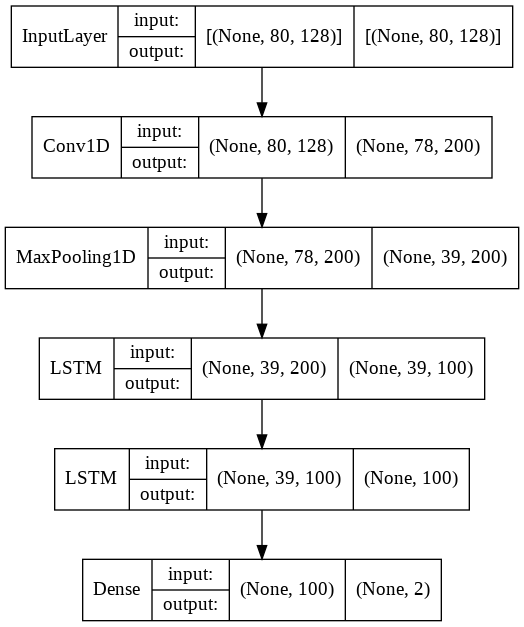

In [30]:
# Membentuk model dengan kombinasi hyperparrameter terbaik
model = tuner.hypermodel.build(best_hps)

#Plot Model
import tensorflow
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB')

In [31]:
# Retrain model pada data test
history = model.fit(X_train, label_train,
                    batch_size=32, epochs=50,
                    validation_data=(X_test, label_test),
                    callbacks=[early_stop])

Epoch 1/50
285/285 [==============================] - 8s 14ms/step - loss: 1.3763 - accuracy: 0.8415 - val_loss: 0.4948 - val_accuracy: 0.8443
Epoch 2/50
285/285 [==============================] - 3s 11ms/step - loss: 0.4362 - accuracy: 0.8533 - val_loss: 0.4018 - val_accuracy: 0.8663
Epoch 3/50
285/285 [==============================] - 3s 11ms/step - loss: 0.3958 - accuracy: 0.8563 - val_loss: 0.3788 - val_accuracy: 0.8764
Epoch 4/50
285/285 [==============================] - 3s 11ms/step - loss: 0.3861 - accuracy: 0.8587 - val_loss: 0.3613 - val_accuracy: 0.8782
Epoch 5/50
285/285 [==============================] - 3s 10ms/step - loss: 0.3743 - accuracy: 0.8617 - val_loss: 0.3653 - val_accuracy: 0.8725
Epoch 6/50
285/285 [==============================] - 3s 10ms/step - loss: 0.3675 - accuracy: 0.8606 - val_loss: 0.3675 - val_accuracy: 0.8751
Epoch 7/50
285/285 [==============================] - 3s 10ms/step - loss: 0.3653 - accuracy: 0.8660 - val_loss: 0.3513 - val_accuracy: 0.8769

In [32]:
# Mendapatkan kinerja model
y_pred = np.argmax(model.predict(X_test), axis=1)
y = np.argmax(label_test, axis=1)
print('accuracy: ', accuracy_score(y, y_pred),
      '\nprecicion: ', precision_score(y, y_pred),
      '\nrecall: ', recall_score(y, y_pred))

accuracy:  0.8715919085312225 
precicion:  0.8195121951219512 
recall:  0.3971631205673759


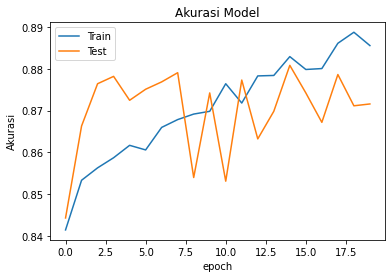

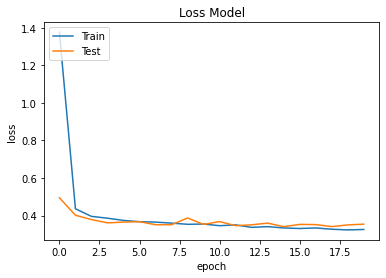

In [34]:
# plot grafik akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot grafik loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()